In [1]:
from losses import binary_crossentropy 
from tensorflow.keras.utils import plot_model
from eunet import build_EUNet
from loading_preprocessing_dataset import prepare_dataset, create_dataset
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

tf.python.client.device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10282429488652405818,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4991850078064024142
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6545962432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17492755232180773242
 physical_device_desc: "device: 0, name: GeForce RTX 2080, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7717904206644337860
 physical_device_desc: "device: XLA_GPU device"]

## 1. Build Efficient U-Net 

In [3]:
model = build_EUNet(number_classes = 1, input_height = 256, input_width = 256)

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 13) 364         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 128, 128, 16) 0           conv2d[0][0]                     
                                                                 max_pooling2d[0][0]          

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0348431 to fit



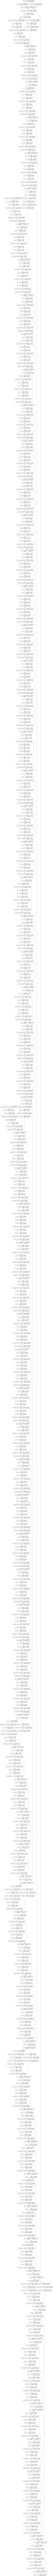

In [5]:
plot_model( model,
            to_file='model.png',
            show_shapes=True,
            show_layer_names=True,
            dpi=1024)

In [7]:
model.compile("adam", loss=binary_crossentropy)

## 2. Load and Prepare Train, Validation and Test tasets

In [8]:
Train_Dataset_dir = "/media/rima/C/Datasets/cut_tirol/Klein_Dataset2/train/"

Valid_Dataset_dir = "/media/rima/C/Datasets/cut_tirol/Klein_Dataset2/valid/"
Test_Dataset_dir = "/media/rima/C/Datasets/cut_tirol/Klein_Dataset2/test/"

In [9]:
train_sb_dir, train_gt_dir, sb_train_list, gt_train_list = prepare_dataset(Train_Dataset_dir) #load Satellite und Ground Truths Data
valid_sb_dir, valid_gt_dir, sb_valid_list, gt_valid_list = prepare_dataset(Valid_Dataset_dir)
test_sb_dir, test_gt_dir, sb_test_list, gt_test_list = prepare_dataset(Test_Dataset_dir)

Satellite Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/train/Croped_SB/
Number of  ground truths: 6876

Ground Truths Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/train/Croped_GT/
Number der satellien images: 6876
*********************************************
Satellite Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/valid/Croped_SB/
Number of  ground truths: 756

Ground Truths Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/valid/Croped_GT/
Number der satellien images: 756
*********************************************
Satellite Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/test/Croped_SB/
Number of  ground truths: 774

Ground Truths Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/test/Croped_GT/
Number der satellien images: 774
*********************************************


In [10]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
N_CHANNELS = 3
number_batches = 8 #
buffer_size =  20000

In [11]:
train_dataset = create_dataset(sb_train_list, gt_train_list, buffer_size =  buffer_size, number_batche = number_batches )
validation_dataset = create_dataset(sb_valid_list, gt_valid_list, buffer_size =  buffer_size, number_batche = number_batches )
test_dataset = create_dataset(sb_test_list, gt_test_list, buffer_size =  buffer_size, number_batche = number_batches )

(8, 256, 256, 3) (8, 256, 256, 1)


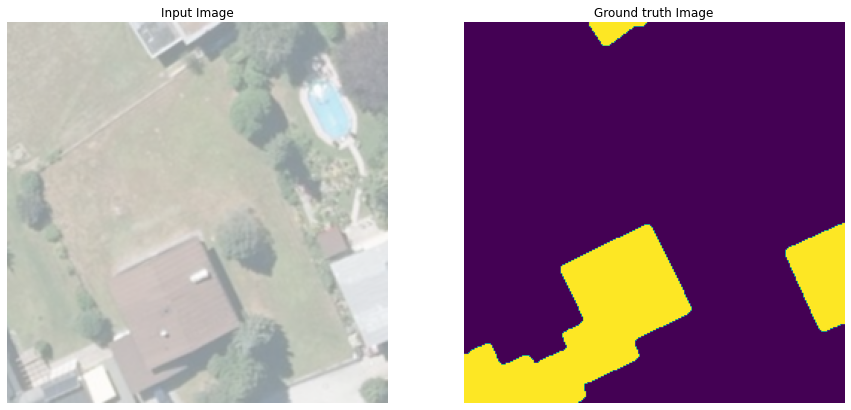

In [13]:
for SB, GT in validation_dataset.take(1):
    plt.figure(figsize=(15,15))
    print(SB.shape, GT.shape)
    display_list=[SB[0,:,:,:,],GT[0,:,:,:,]]
    title = ['Input Image', 'Ground truth Image']
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i]*.5+.5 )
        plt.axis('off')
    plt.show()

In [ ]:
model.fit(train_dataset,
          epochs= 50,
          verbose=1,
          callbacks=None,
          validation_data= validation_dataset,)

Epoch 1/50
860/860 [==============================] - 111s 129ms/step - loss: 0.7160 - val_loss: 0.5164
Epoch 2/50
860/860 [==============================] - 110s 128ms/step - loss: 0.5302 - val_loss: 0.4462
Epoch 3/50
860/860 [==============================] - 112s 130ms/step - loss: 0.5052 - val_loss: 0.4216
Epoch 4/50
860/860 [==============================] - 112s 130ms/step - loss: 0.4926 - val_loss: 0.3982
Epoch 5/50
860/860 [==============================] - 113s 131ms/step - loss: 0.4605 - val_loss: 0.3571
Epoch 6/50
860/860 [==============================] - 114s 132ms/step - loss: 0.4177 - val_loss: 0.4799
Epoch 7/50
860/860 [==============================] - 113s 132ms/step - loss: 0.3775 - val_loss: 0.2686
Epoch 8/50
860/860 [==============================] - 114s 132ms/step - loss: 0.3555 - val_loss: 0.2889
Epoch 9/50
860/860 [==============================] - 113s 131ms/step - loss: 0.3418 - val_loss: 0.2482
Epoch 10/50
860/860 [==============================] - 112s 130m

In [ ]:
dec_4_1 = de_bottleneck(dec_4, None, number_class,reverse_module=True )  # bottleneck 4.1   
dec_4_2 = de_bottleneck(dec_4_1, None, number_class,reverse_module=True)  # bottleneck 4.2  
dec_4_3 = de_bottleneck(dec_4_2, dec_4, number_class,reverse_module=False )  # bottleneck 4.3   
Epoch 32/32
215/215 [==============================] - 78s 364ms/step - loss: 0.4992 - val_loss: 0.4092

In [ ]:
dec_4_1 = de_bottleneck(dec_4, None, number_class,reverse_module=False )  # bottleneck 4.1   
dec_4_2 = de_bottleneck(dec_4_1, None, number_class,reverse_module=False)  # bottleneck 4.2    
dec_4_3 = de_bottleneck(dec_4_2, dec_4, number_class,reverse_module=False )  # bottleneck 4.3   
Epoch 24/32
215/215 [==============================] - 78s 361ms/step - loss: 0.4764 - val_loss: 0.3791 
        
Epoch 32/32
215/215 [==============================] - 77s 356ms/step - loss: 0.5022 - val_loss: 0.4143

In [ ]:
dec_4_1 = de_bottleneck(dec_4, None, number_class,reverse_module=True )  # bottleneck 4.1   
dec_4_2 = de_bottleneck(dec_4_1, None, number_class,reverse_module=True)  # bottleneck 4.2    
dec_4_3 = de_bottleneck(dec_4_2, dec_4, number_class,reverse_module=True )  # bottleneck 4.3   

215/215 [==============================] - 77s 360ms/step - loss: 0.4146 - val_loss: 0.3199

In [ ]:
dec_1 = de_bottleneck(enc_layer3,None, 64, upsample=True, reverse_module=True)
dec_1 = de_bottleneck(dec_1,None, 64,reverse_module=True)  # bottleneck 1.1
dec_1 = de_bottleneck(dec_1,None, 64,reverse_module=True)  # bottleneck 1.2
    


dec_4 = de_bottleneck(dec_3, en_input, number_class, upsample=True, reverse_module=True)  
dec_4_1 = de_bottleneck(dec_4, None, number_class,reverse_module=True )  # bottleneck 4.1   
dec_4_2 = de_bottleneck(dec_4_1, None, number_class,reverse_module=True)  # bottleneck 4.2    
dec_4_3 = de_bottleneck(dec_4_2, dec_4, number_class,reverse_module=True )  # bottleneck 4.3   

Epoch 25/32
215/215 [==============================] - 80s 373ms/step - loss: 0.5010 - val_loss: 0.4199